In [33]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
transportation_data_complete = pd.merge(city_data, ride_data, on=["city"])

In [34]:
# Display the data table for preview
transportation_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [35]:
#average fare per city and type
#city_group=transportation_data_complete.groupby(["city","type"])
#average_fare=city_group["fare"].mean().reset_index()
#average_fare_by_type=average_fare.set_index('type')
#average_fare_urban=average_fare_by_type.loc["Urban"]
#average_fare_rural=average_fare_by_type.loc["Rural"]
#average_fare_suburban=average_fare_by_type.loc["Suburban"]

#total number of rides per city
count_rides=city_group['ride_id'].count().reset_index()
count_rides_by_type=count_rides.set_index('type')
count_rides_urban=count_rides_by_type.loc["Urban"]
count_rides_rural=count_rides_by_type.loc["Rural"]
count_rides_suburban=count_rides_by_type.loc["Suburban"]

#total number of drivers per city
#drivers=city_data[["city","driver_count","type"]]
#drivers_by_type=drivers.set_index('type')
#drivers_urban=drivers_by_type.loc["Urban"]
#drivers_rural=drivers_by_type.loc["Rural"]
#drivers_suburban=drivers_by_type.loc["Suburban"]

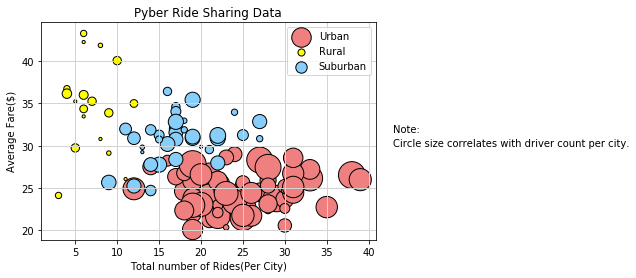

In [58]:
# Obtain the x and y coordinates for each of the three city types

#plot data for Urban cities
x_urban= count_rides_urban['ride_id']
y_urban= average_fare_urban['fare']
plt.scatter(x_urban,y_urban, color="lightcoral",edgecolors= "black",s=drivers_urban['driver_count']*10,alpha=1.0,
           label="Urban")

#plot data for Rural cities
x_rural= count_rides_rural['ride_id']
y_rural= average_fare_rural['fare']
plt.scatter(x_rural,y_rural,color="yellow",edgecolors= "black", s=drivers_rural['driver_count']*10,alpha=1.0,
            label="Rural")

#plot data for Suburban cities
x_suburban= count_rides_suburban['ride_id']
y_suburban= average_fare_suburban['fare']
plt.scatter(x_suburban,y_suburban,color="lightskyblue",edgecolors= "black",s=drivers_suburban['driver_count']*10,
            alpha=1.0, label="Suburban")

#Creates a grid
plt.grid(color='lightgray', linestyle='-', linewidth=1)

#legend
plt.legend(loc="best")

#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]


plt.xlabel("Total number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data")
# Adding note on right hand side
textstr = ('Note:')
plt.text(.94, 0.5, textstr, fontsize=10, transform=plt.gcf().transFigure)
textstr = ('Circle size correlates with driver count per city.')
plt.text(.94, 0.45, textstr, fontsize=10, transform=plt.gcf().transFigure)
# Save Figure
plt.savefig("data/CityRideScatter.png")
#Show
plt.show()

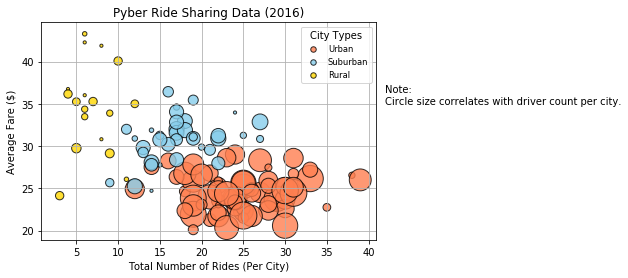

## Total Fares by City Type

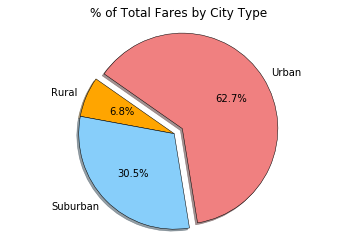

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
transportation_data_complete = pd.merge(city_data, ride_data, on=["city"])

#group by type to be used by all pie charts
by_type = transportation_data_complete.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build lables
labels = fare_sum.index

# The colors of each section of the pie chart
colors = ["orange","lightskyblue","lightcoral"]
#Explode
explode = [0 , 0, .1]
#Creates Pie
plt.pie(fare_sum, startangle = 145, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
# Save Figure
plt.savefig("data/FareCityType.png")
#Show Plot
plt.show()

36


## Total Rides by City Type

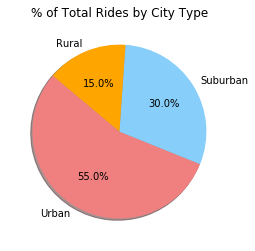

In [25]:
# Build Pie Chart
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Save Figure
# File to Load (Remember to change these)
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
transportation_data_complete = pd.merge(city_data, ride_data, on=["city"])

#total number of rides per city
count_rides=city_group['ride_id'].count().reset_index()
count_rides_by_type=count_rides.set_index('type')
count_rides_urban=count_rides_by_type.loc["Urban"]
count_rides_rural=count_rides_by_type.loc["Rural"]
count_rides_suburban=count_rides_by_type.loc["Suburban"]

count_rides_rural=len(count_rides_rural)
count_rides_suburban=len(count_rides_suburban)
count_rides_urban=len(count_rides_urban)

sizes=(count_rides_urban, count_rides_suburban, count_rides_rural)

# Tells matplotlib to seperate the "Python" section from the others
#explode = (0.1, 0, 0, 0)

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("data/TotalRideType.png")
#Show
plt.show()


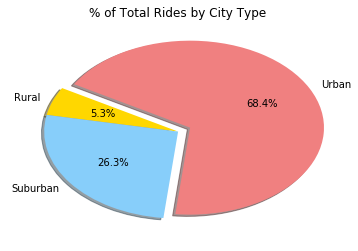

In [5]:
# Show Figure
#plt.show()

## Total Drivers by City Type

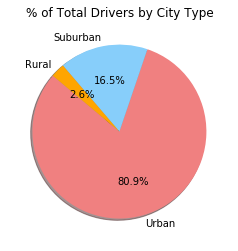

In [26]:
# Build Pie Chart
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Save Figure
# File to Load (Remember to change these)
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#total number of drivers per city
drivers=city_data[["city","driver_count","type"]]
drivers_by_type=drivers.set_index('type')
drivers_urban=drivers_by_type.loc["Urban"]
drivers_rural=drivers_by_type.loc["Rural"]
drivers_suburban=drivers_by_type.loc["Suburban"]

drivers_rural_pie=sum(drivers_rural["driver_count"])
drivers_suburban_pie=sum(drivers_suburban["driver_count"])
drivers_urban_pie=sum(drivers_urban["driver_count"])


sizes=(drivers_urban_pie, drivers_suburban_pie, drivers_rural_pie)

# Tells matplotlib to seperate the "Python" section from the others
#explode = (0.1, 0, 0, 0)

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("data/TotalDriversType.png")
#Show
plt.show()


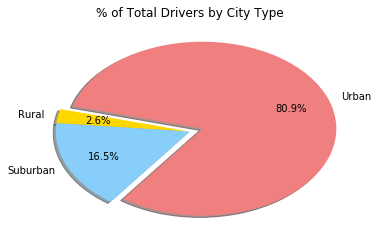

In [6]:
# Show Figure
#plt.show()